# Prediction with saved model

In [80]:
import pathlib
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Config

In [81]:
img_height = 180
img_width = 180

class_names = ['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [82]:
# Load model
saved_improved_model = keras.models.load_model('saved_model/improved_model')
# Check its architecture
saved_improved_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 90, 90, 64)        9280      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 45, 45, 128)     

### Evaluate

In [87]:
test_dataset = keras.utils.image_dataset_from_directory(
    pathlib.Path("data/sample/"),
    image_size=(img_height, img_width),
    batch_size=128
)

print("Evaluate")
result = saved_improved_model.evaluate(test_dataset)
dict(zip(saved_improved_model.metrics_names, result))

Found 40 files belonging to 5 classes.
Evaluate
1/1 [==============================] - 0s 145ms/step - loss: 2.5852 - accuracy: 0.7000


{'loss': 2.585174083709717, 'accuracy': 0.699999988079071}

### Confusion Matrix

1/1 [==============================] - 0s 204ms/step


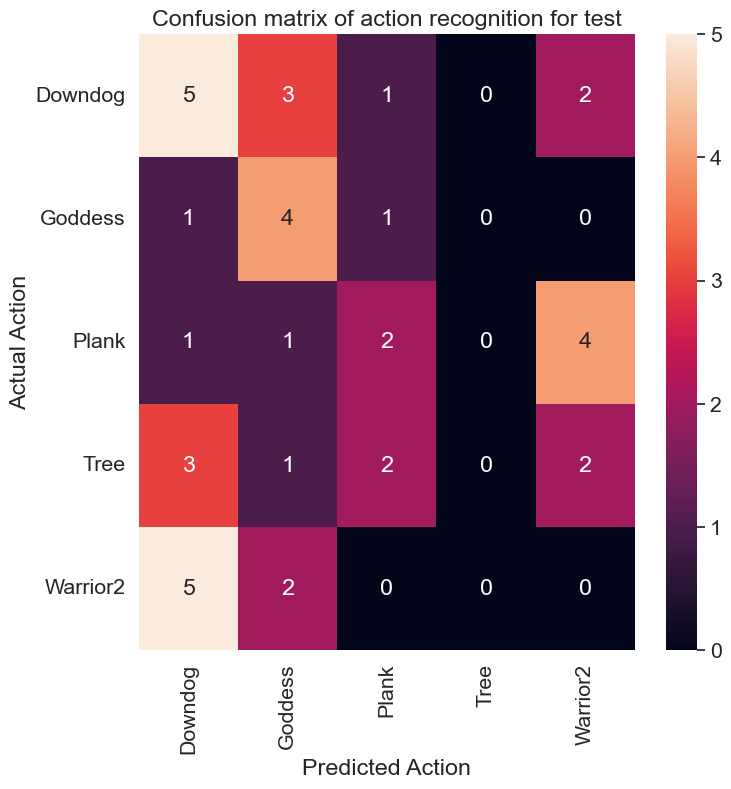

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_actual_predicted_labels(dataset):
    """
      Create a list of actual ground truth values and the predictions from the model.

      Args:
        dataset: An iterable data structure, such as a TensorFlow Dataset, with features and labels.

      Return:
        Ground truth and predicted values for a particular dataset.
    """
    actual = [labels for _, labels in dataset.unbatch()]
    predicted = saved_improved_model.predict(dataset)

    actual = tf.stack(actual, axis=0)
    predicted = tf.concat(predicted, axis=0)
    predicted = tf.argmax(predicted, axis=1)

    return actual, predicted

def plot_confusion_matrix(actual, predicted, labels, ds_type):
    cm = tf.math.confusion_matrix(actual, predicted)
    ax = sns.heatmap(cm, annot=True, fmt='g')
    sns.set(rc={'figure.figsize':(8, 8)})
    sns.set(font_scale=1.4)
    ax.set_title('Confusion matrix of action recognition for ' + ds_type)
    ax.set_xlabel('Predicted Action')
    ax.set_ylabel('Actual Action')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

# Print the heatmap
actual, predicted = get_actual_predicted_labels(test_dataset)
plot_confusion_matrix(actual, predicted, class_names, 'test')

### Predict

In [86]:
image_batch, labels_batch = next(iter(test_dataset))

print(labels_batch.shape)

predictions = saved_improved_model.predict(image_batch)
scores = tf.nn.softmax(predictions)

for i, score in list(enumerate(scores)):
    print(
    "{}: most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[labels_batch[i]], class_names[np.argmax(score)], 100 * np.max(score))
)

(40,)
2/2 [==============================] - 0s 25ms/step
Warrior2: most likely belongs to Warrior2 with a 77.22 percent confidence.
Tree: most likely belongs to Goddess with a 96.96 percent confidence.
Downdog: most likely belongs to Downdog with a 99.10 percent confidence.
Goddess: most likely belongs to Goddess with a 54.32 percent confidence.
Goddess: most likely belongs to Goddess with a 89.07 percent confidence.
Plank: most likely belongs to Plank with a 85.93 percent confidence.
Tree: most likely belongs to Plank with a 26.73 percent confidence.
Goddess: most likely belongs to Goddess with a 95.61 percent confidence.
Downdog: most likely belongs to Downdog with a 99.76 percent confidence.
Downdog: most likely belongs to Downdog with a 99.84 percent confidence.
Warrior2: most likely belongs to Warrior2 with a 80.57 percent confidence.
Tree: most likely belongs to Goddess with a 96.63 percent confidence.
Warrior2: most likely belongs to Warrior2 with a 99.86 percent confidence.
Do